In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, utils
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Activation, BatchNormalization

In [2]:
# Load the Fashion-MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Normalize pixel values to [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
# Reshape images for CNN input (add channel dimension)
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [5]:
# one-hot encoding
train_labels = utils.to_categorical(train_labels)
test_labels = utils.to_categorical(test_labels)

In [6]:
# Create a simple CNN model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(28, 28, 1)),
    layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [8]:
# Train the model
history = model.fit(train_images, train_labels, batch_size=128, epochs=5, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 323s 761ms/step - loss: 0.4572 - accuracy: 0.8352 - val_loss: 0.3229 - val_accuracy: 0.8817
Epoch 2/5
422/422 [==============================] - 321s 760ms/step - loss: 0.2741 - accuracy: 0.9009 - val_loss: 0.2648 - val_accuracy: 0.9002
Epoch 3/5
422/422 [==============================] - 318s 754ms/step - loss: 0.2253 - accuracy: 0.9179 - val_loss: 0.2355 - val_accuracy: 0.9125
Epoch 4/5
422/422 [==============================] - 321s 761ms/step - loss: 0.1902 - accuracy: 0.9304 - val_loss: 0.2213 - val_accuracy: 0.9188
Epoch 5/5
422/422 [==============================] - 317s 752ms/step - loss: 0.1702 - accuracy: 0.9371 - val_loss: 0.2126 - val_accuracy: 0.9232


In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")

313/313 [==============================] - 16s 50ms/step - loss: 0.2296 - accuracy: 0.9196
Test accuracy: 0.9196


In [10]:
# Plot the accuracy and loss curves
# Extract the metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

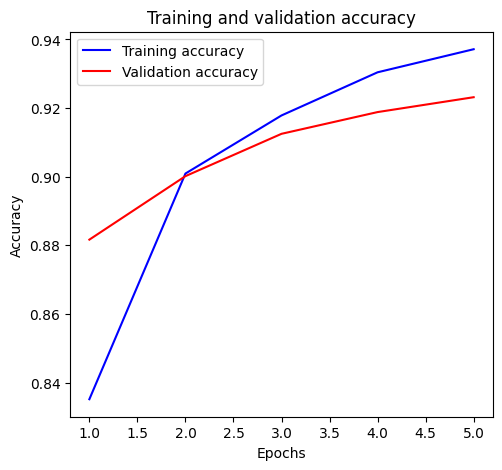

In [11]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

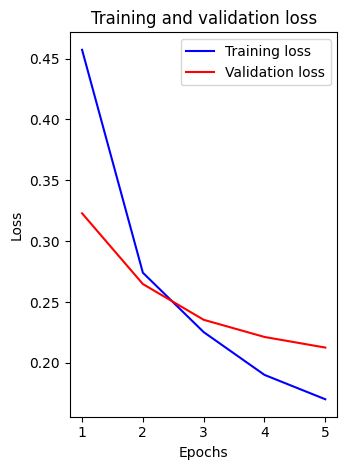

In [12]:
# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()